Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

Import .csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Number of Transactions are ', Total_transactions)
print('Number of Normal Transactions are ', normal)
print('Number of fraudulent Transactions are ',fraudulent)
print('Percentage of fraud Transactions is ',fraud_percentage)

Number of Transactions are  284807
Number of Normal Transactions are  284315
Number of fraudulent Transactions are  492
Percentage of fraud Transactions is  0.17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [ ]:
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
X = data.iloc[:, :-1].values
y = data['Class'].values

Split Train Test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

DT = DecisionTreeClassifier(max_depth = 4)
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)

In [ ]:
print('Accuracy score of the Decision Tree model is ',accuracy_score(y_test, dt_pred))

Accuracy score of the Decision Tree model is  0.9991729061466132


In [ ]:
print('F1 score of the Decision Tree model is ',f1_score(y_test, dt_pred))

F1 score of the Decision Tree model is  0.7510917030567686


[Text(0.5288461538461539, 0.9, 'X[16] <= -2.754\ngini = 0.003\nsamples = 206747\nvalue = [206402, 345]'),
 Text(0.3076923076923077, 0.7, 'X[9] <= -2.129\ngini = 0.343\nsamples = 309\nvalue = [68, 241]'),
 Text(0.15384615384615385, 0.5, 'X[25] <= -0.224\ngini = 0.25\nsamples = 273\nvalue = [40, 233]'),
 Text(0.07692307692307693, 0.3, 'X[26] <= 1.201\ngini = 0.447\nsamples = 80\nvalue = [27, 53]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.23076923076923078, 0.3, 'X[3] <= 1.166\ngini = 0.126\nsamples = 193\nvalue = [13, 180]'),
 Text(0.19230769230769232, 0.1, 'gini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.2692307692307692, 0.1, 'gini = 0.074\nsamples = 182\nvalue = [7, 175]'),
 Text(0.46153846153846156, 0.5, 'X[17] <= -1.673\ngini = 0.346\nsamples = 36\nvalue = [28, 8]'),
 Text(0.38461538461538464, 0.3, 'X[21] <= 0.586\ngini = 0.463\nsamples = 11\nvalue =

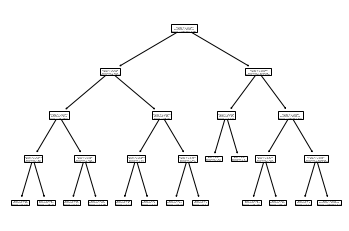

In [ ]:
plot_tree(DT)

In [ ]:
confusion_matrix(y_test, dt_pred)

array([[68773,    15],
       [   42,    86]])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
print('Accuracy score of the Logistic Regression model is ', accuracy_score(y_test, lr_pred))

Accuracy score of the Logistic Regression model is  0.9989552498694062


In [ ]:
print('F1 score of the Logistic Regression model is ',f1_score(y_test, lr_pred))

F1 score of the Logistic Regression model is  0.6666666666666666


Random Foresst Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
print('Accuracy score of the Random Forest model is ',accuracy_score(y_test, rf_pred))

Accuracy score of the Random Forest model is  0.9991293748911718


In [ ]:
print('F1 score of the Random Forest model is ',f1_score(y_test, rf_pred))

F1 score of the Random Forest model is  0.7222222222222223


Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
print('Accuracy score of the Support Vector Machines model is ', accuracy_score(y_test, svm_pred))

Accuracy score of the Support Vector Machines model is  0.999318010331418


In [ ]:
print('F1 score of the Support Vector Machines model is ', f1_score(y_test, svm_pred))

F1 score of the Support Vector Machines model is  0.7813953488372093


K - Neighbours Classifier

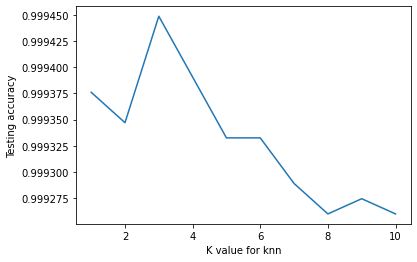

{1: 0.9993760520053399, 2: 0.9993470311683789, 3: 0.9994486040977422, 4: 0.9993905624238203, 5: 0.9993325207498984, 6: 0.9993325207498984, 7: 0.999288989494457, 8: 0.9992599686574961, 9: 0.9992744790759766, 10: 0.9992599686574961}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,11)
scores={}
scores_list=[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  knn_pred = knn.predict(X_test)  
  scores[k]=accuracy_score(y_test, knn_pred)
  scores_list.append(accuracy_score(y_test, knn_pred))

plt.plot(k_range,scores_list)
plt.xlabel("K value for knn")
plt.ylabel("Testing accuracy")
plt.show()
print(scores)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n = 8
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_pred = KNN.predict(X_test)

In [ ]:
print('Accuracy score of the K-Nearest Neighbors model is ',accuracy_score(y_test, knn_pred))

Accuracy score of the K-Nearest Neighbors model is  0.9992599686574961


In [ ]:
print('F1 score of the K-Nearest Neighbors model is ', f1_score(y_test, knn_pred))

F1 score of the K-Nearest Neighbors model is  0.7848101265822784
